In [ ]:
pip install d2l

In [ ]:
pip install matplotlib==3.0.0

# Perception Code

## Perception torch code

In [3]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from d2l import torch as d2l

1. 载入数据集

In [4]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2. 定义网络层

输入层，hidden层，输出层

In [5]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(
    torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01  
  )

b1 = nn.Parameter(
    torch.zeros(num_hiddens, requires_grad=True)
  )

W2 = nn.Parameter(
    torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01  
  )

b2 = nn.Parameter(
    torch.zeros(num_outputs, requires_grad=True) * 0.01  
  )


In [6]:
params = [W1, b1, W2, b2]

3. 定义网络

In [7]:
net = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 256), # 隐藏层线性模型
    nn.ReLU(), # 激活隐藏层
    nn.Linear(256, 10)
    )

4. 初始化参数

In [8]:
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

5. 定义loss

In [9]:
loss = nn.CrossEntropyLoss()

6. 定义优化器

In [10]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

7. Training and Prediction

In [11]:
def acc(X,y,net):
  p_predict = net(X)
  y_predict = torch.argmax(p_predict,axis=1)
  output = y_predict - y
  right_pre = len(output[output==0])
  right_accu = right_pre/len(output)
  return right_accu

In [12]:
epochs = 20
train_accu_history = []
test_accu_history = []
train_loss = []
for epoch in range(epochs):

  for X,y in train_iter:

    l = loss(net(X), y)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

  l = loss(net(X), y)
  train_loss.append(l.detach())

  train_batch = 0
  train_accu = 0
  
  test_batch = 0
  test_accu = 0
  
  for X_train,y_train in train_iter:
    train_accu += acc(X_train, y_train, net)
    train_batch += 1
    train_avg_acc = train_accu/train_batch
  train_accu_history.append(train_avg_acc)

  for X_test,y_test in test_iter:
    test_accu += acc(X_test, y_test, net)
    test_batch += 1
    avg_acc = test_accu/test_batch
  test_accu_history.append(avg_acc)


  print(f'epoch {epoch + 1}, loss {l:f}, train_accu {train_avg_acc:f}, test_accu {avg_acc:f}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1, loss 1.859383, train_accu 0.452388, test_accu 0.445020
epoch 2, loss 1.200269, train_accu 0.622911, test_accu 0.616992
epoch 3, loss 1.028513, train_accu 0.664583, test_accu 0.652246
epoch 4, loss 0.948160, train_accu 0.683001, test_accu 0.668750
epoch 5, loss 0.872777, train_accu 0.704754, test_accu 0.694727
epoch 6, loss 0.793644, train_accu 0.727842, test_accu 0.717676
epoch 7, loss 0.813485, train_accu 0.751258, test_accu 0.744336
epoch 8, loss 0.591461, train_accu 0.758428, test_accu 0.752930
epoch 9, loss 0.690905, train_accu 0.774230, test_accu 0.768555
epoch 10, loss 0.566383, train_accu 0.783466, test_accu 0.776758
epoch 11, loss 0.548102, train_accu 0.790182, test_accu 0.779395
epoch 12, loss 0.538783, train_accu 0.795224, test_accu 0.785254
epoch 13, loss 0.567733, train_accu 0.803635, test_accu 0.792383
epoch 14, loss 0.472033, train_accu 0.805685, test_accu 0.795410
epoch 15, loss 0.541149, train_accu 0.812068, test_accu 0.799805
epoch 16, loss 0.517816, train_acc

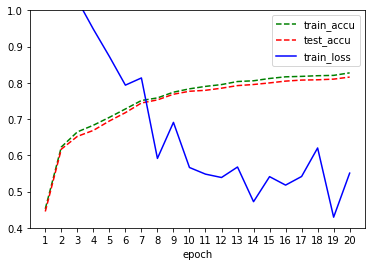

In [15]:
x_label_value = [str(i) for i in range(1,epochs+1)]
plt.plot(x_label_value, train_accu_history, label='train_accu', color='g', linestyle='dashed')
plt.plot(x_label_value, test_accu_history, label='test_accu', color='r', linestyle='dashed')
plt.plot(x_label_value, train_loss, label='train_loss', color='b')
plt.xlabel('epoch')
plt.ylim(0.4,1)
plt.legend()
plt.show()